In [2]:
# This setups everything

import numpy as np
from qiskit import *
%matplotlib inline

In [3]:
q = QuantumRegister(3,'q')

In [4]:
circ = QuantumCircuit(q)

In [5]:
# This builds the initial state for the two-qubit system as suggested in the paper

circ.h(q[0])
circ.s(q[0])
circ.h(q[2])
circ.cx(q[2],q[1])


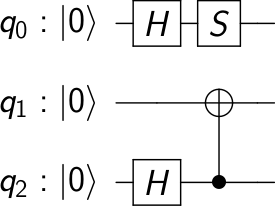

In [6]:
circ.draw(output='latex')

In [7]:
# We are going to simulate the circuit using Qiskit Aer

from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator') #->basically this runs the circuit
job = execute(circ,backend)

result = job.result()
outputstate = result.get_statevector(circ,decimals=3)

print(outputstate)

[0.5+0.j  0. +0.5j 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.5j]


In [68]:
# Construyamos el mismo estado de otra forma 

q = QuantumRegister(2,'q') #---> solo necesitamos dos qubits !

circ2 = QuantumCircuit(q)

# Estado |+y><+y| para el qubit 0
circ2.h(q[0])
circ2.s(q[0])


In [69]:
# Podemos construir un estado mixto utilizando generadores de numeros aleatorios?

import random

for x in range(1):
    prob = random.randint(1,2)
if prob==1:
    circ2.x(q[1])
else :
    circ2.iden(q[1])
    
    # Implementacion descrita en el apendice C de 'Compressed Quantum Computation[...]'

In [66]:
backend = BasicAer.get_backend('statevector_simulator') #->basically this runs the circuit
job = execute(circ2,backend)

result = job.result()
outputstate = result.get_statevector(circ2,decimals=3)

print(outputstate)

[0.   +0.j    0.   +0.j    0.707+0.j    0.   +0.707j]


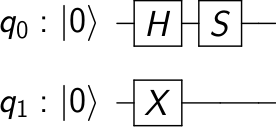

In [67]:
circ2.draw(output='latex')